## BUSINESS UNDERSTANDING

### Business Objective

In [410]:
# STANDARD LIBRARIES
import os                          # Interacting with the operating system (file paths, directories)
import math                        # Math functions (e.g., sqrt)
import pickle                      # Save/load Python objects
import joblib                      # Save/load trained models efficiently

# DATA MANIPULATION & NUMERICAL COMPUTATION
import pandas as pd                # Data loading, cleaning, and manipulation
import numpy as np                 # Numerical operations and array manipulation

# VISUALIZATION
import matplotlib.pyplot as plt    # General-purpose plotting
import seaborn as sns              # Statistical data visualization
sns.set(style="whitegrid")         # Makes plots look cleaner
plt.rcParams["figure.figsize"] = (12, 5)  # Default figure size

# STATISTICS
from scipy import stats             # Statistical functions, e.g., z-score, t-tests
from scipy.stats import entropy

# MACHINE LEARNING
import xgboost as xgb               # XGBoost for gradient boosting models
from sklearn.model_selection import (
    train_test_split,              # Split data into train/test sets
    StratifiedKFold,               # Cross-validation preserving class distribution
    GridSearchCV                   # Hyperparameter tuning
)
from sklearn.ensemble import (
    RandomForestClassifier,        # Random Forest classifier
    VotingClassifier,              # Combine multiple models via voting
    GradientBoostingRegressor      # Gradient boosting for regression
)
from sklearn.linear_model import LogisticRegression  # Logistic regression classifier
from sklearn.metrics import (
    accuracy_score,
    fbeta_score,                   # F-beta score for classification performance
    precision_recall_curve,        # Precision-recall curve
    classification_report,         # Detailed classification metrics
    mean_squared_error,            # Regression metric
    mean_absolute_error,           # Regression metric
    silhouette_score
)
from sklearn.preprocessing import StandardScaler  # Feature scaling
from sklearn.cluster import KMeans                 # Clustering algorithm
from sklearn.decomposition import PCA

# HANDLING IMBALANCED DATA
from imblearn.over_sampling import SMOTE          # Synthetic oversampling for minority class
from imblearn.pipeline import Pipeline            # Pipelines compatible with imbalanced-learn

# MISCELLANEOUS SETTINGS
pd.set_option("display.max_columns", None)       # Display all columns in DataFrame

import warnings
warnings.filterwarnings('ignore')                # Suppress warnings for cleaner output


## DATA UNDERSTANDING

### Dataset Inspection

In [165]:
# File path
data_path = "electricityloaddiagrams20112014/LD2011_2014.txt"

In [167]:
# Load raw dataset
df = pd.read_csv(
    data_path,          
    sep=";",           # Fields are separated by semicolons (common in European CSVs)
    decimal=",",       # Numbers use a comma as decimal separator (e.g., "3,14"); switch to "." if needed
    parse_dates=[0],   # Parse the first column (index 0) as datetime
    index_col=0        # Set the first column as the DataFrame index
)

In [168]:
# Snippet of the data
df.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020,MT_021,MT_022,MT_023,MT_024,MT_025,MT_026,MT_027,MT_028,MT_029,MT_030,MT_031,MT_032,MT_033,MT_034,MT_035,MT_036,MT_037,MT_038,MT_039,MT_040,MT_041,MT_042,MT_043,MT_044,MT_045,MT_046,MT_047,MT_048,MT_049,MT_050,MT_051,MT_052,MT_053,MT_054,MT_055,MT_056,MT_057,MT_058,MT_059,MT_060,MT_061,MT_062,MT_063,MT_064,MT_065,MT_066,MT_067,MT_068,MT_069,MT_070,MT_071,MT_072,MT_073,MT_074,MT_075,MT_076,MT_077,MT_078,MT_079,MT_080,MT_081,MT_082,MT_083,MT_084,MT_085,MT_086,MT_087,MT_088,MT_089,MT_090,MT_091,MT_092,MT_093,MT_094,MT_095,MT_096,MT_097,MT_098,MT_099,MT_100,MT_101,MT_102,MT_103,MT_104,MT_105,MT_106,MT_107,MT_108,MT_109,MT_110,MT_111,MT_112,MT_113,MT_114,MT_115,MT_116,MT_117,MT_118,MT_119,MT_120,MT_121,MT_122,MT_123,MT_124,MT_125,MT_126,MT_127,MT_128,MT_129,MT_130,MT_131,MT_132,MT_133,MT_134,MT_135,MT_136,MT_137,MT_138,MT_139,MT_140,MT_141,MT_142,MT_143,MT_144,MT_145,MT_146,MT_147,MT_148,MT_149,MT_150,MT_151,MT_152,MT_153,MT_154,MT_155,MT_156,MT_157,MT_158,MT_159,MT_160,MT_161,MT_162,MT_163,MT_164,MT_165,MT_166,MT_167,MT_168,MT_169,MT_170,MT_171,MT_172,MT_173,MT_174,MT_175,MT_176,MT_177,MT_178,MT_179,MT_180,MT_181,MT_182,MT_183,MT_184,MT_185,MT_186,MT_187,MT_188,MT_189,MT_190,MT_191,MT_192,MT_193,MT_194,MT_195,MT_196,MT_197,MT_198,MT_199,MT_200,MT_201,MT_202,MT_203,MT_204,MT_205,MT_206,MT_207,MT_208,MT_209,MT_210,MT_211,MT_212,MT_213,MT_214,MT_215,MT_216,MT_217,MT_218,MT_219,MT_220,MT_221,MT_222,MT_223,MT_224,MT_225,MT_226,MT_227,MT_228,MT_229,MT_230,MT_231,MT_232,MT_233,MT_234,MT_235,MT_236,MT_237,MT_238,MT_239,MT_240,MT_241,MT_242,MT_243,MT_244,MT_245,MT_246,MT_247,MT_248,MT_249,MT_250,MT_251,MT_252,MT_253,MT_254,MT_255,MT_256,MT_257,MT_258,MT_259,MT_260,MT_261,MT_262,MT_263,MT_264,MT_265,MT_266,MT_267,MT_268,MT_269,MT_270,MT_271,MT_272,MT_273,MT_274,MT_275,MT_276,MT_277,MT_278,MT_279,MT_280,MT_281,MT_282,MT_283,MT_284,MT_285,MT_286,MT_287,MT_288,MT_289,MT_290,MT_291,MT_292,MT_293,MT_294,MT_295,MT_296,MT_297,MT_298,MT_299,MT_300,MT_301,MT_302,MT_303,MT_304,MT_305,MT_306,MT_307,MT_308,MT_309,MT_310,MT_311,MT_312,MT_313,MT_314,MT_315,MT_316,MT_317,MT_318,MT_319,MT_320,MT_321,MT_322,MT_323,MT_324,MT_325,MT_326,MT_327,MT_328,MT_329,MT_330,MT_331,MT_332,MT_333,MT_334,MT_335,MT_336,MT_337,MT_338,MT_339,MT_340,MT_341,MT_342,MT_343,MT_344,MT_345,MT_346,MT_347,MT_348,MT_349,MT_350,MT_351,MT_352,MT_353,MT_354,MT_355,MT_356,MT_357,MT_358,MT_359,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.770335,0.0,0.0,0.0,0.0,0.0,0.0,260.416667,45.721750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.203369,0.0,38.342246,20.363985,0.0,1935.185185,158.006363,1965.437788,0.0,0.0,838.461538,0.0,50.756208,24.570605,0.0,137.885196,80.797011,0.0,74.562212,76.792763,41.482587,0.0,0.0,0.0,93.291732,0.0,39.588859,45.717456,0.0,0.0,0.0,13.422819,22.123746,205.835962,327.859238,920.863309,285.607755,266.521027,1826.271186,218.274112,12166.666667,76.612903,148.867314,272.935780,428.414097,173.089071,235.492958,319.354839,447.761194,288.135593,110.538373,345.578231,4235.294118,260.93750,472.868217,84.0,232.558140,603.036876,199.592668,207.532051,1328.903654,113.074205,680.529301,204.301075,1278.481013,81.728267,444.000000,517.333333,0.0,189.121951,325.833980,228.249744,3263.157895,582.689335,62.219731,380.410959,58.148148,84.924782,38.108720,450.

In [169]:
# Confirming the shape
df.shape

(140256, 370)

In [170]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0 MB


In [171]:
# Data Statistics
df.describe()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020,MT_021,MT_022,MT_023,MT_024,MT_025,MT_026,MT_027,MT_028,MT_029,MT_030,MT_031,MT_032,MT_033,MT_034,MT_035,MT_036,MT_037,MT_038,MT_039,MT_040,MT_041,MT_042,MT_043,MT_044,MT_045,MT_046,MT_047,MT_048,MT_049,MT_050,MT_051,MT_052,MT_053,MT_054,MT_055,MT_056,MT_057,MT_058,MT_059,MT_060,MT_061,MT_062,MT_063,MT_064,MT_065,MT_066,MT_067,MT_068,MT_069,MT_070,MT_071,MT_072,MT_073,MT_074,MT_075,MT_076,MT_077,MT_078,MT_079,MT_080,MT_081,MT_082,MT_083,MT_084,MT_085,MT_086,MT_087,MT_088,MT_089,MT_090,MT_091,MT_092,MT_093,MT_094,MT_095,MT_096,MT_097,MT_098,MT_099,MT_100,MT_101,MT_102,MT_103,MT_104,MT_105,MT_106,MT_107,MT_108,MT_109,MT_110,MT_111,MT_112,MT_113,MT_114,MT_115,MT_116,MT_117,MT_118,MT_119,MT_120,MT_121,MT_122,MT_123,MT_124,MT_125,MT_126,MT_127,MT_128,MT_129,MT_130,MT_131,MT_132,MT_133,MT_134,MT_135,MT_136,MT_137,MT_138,MT_139,MT_140,MT_141,MT_142,MT_143,MT_144,MT_145,MT_146,MT_147,MT_148,MT_149,MT_150,MT_151,MT_152,MT_153,MT_154,MT_155,MT_156,MT_157,MT_158,MT_159,MT_160,MT_161,MT_162,MT_163,MT_164,MT_165,MT_166,MT_167,MT_168,MT_169,MT_170,MT_171,MT_172,MT_173,MT_174,MT_175,MT_176,MT_177,MT_178,MT_179,MT_180,MT_181,MT_182,MT_183,MT_184,MT_185,MT_186,MT_187,MT_188,MT_189,MT_190,MT_191,MT_192,MT_193,MT_194,MT_195,MT_196,MT_197,MT_198,MT_199,MT_200,MT_201,MT_202,MT_203,MT_204,MT_205,MT_206,MT_207,MT_208,MT_209,MT_210,MT_211,MT_212,MT_213,MT_214,MT_215,MT_216,MT_217,MT_218,MT_219,MT_220,MT_221,MT_222,MT_223,MT_224,MT_225,MT_226,MT_227,MT_228,MT_229,MT_230,MT_231,MT_232,MT_233,MT_234,MT_235,MT_236,MT_237,MT_238,MT_239,MT_240,MT_241,MT_242,MT_243,MT_244,MT_245,MT_246,MT_247,MT_248,MT_249,MT_250,MT_251,MT_252,MT_253,MT_254,MT_255,MT_256,MT_257,MT_258,MT_259,MT_260,MT_261,MT_262,MT_263,MT_264,MT_265,MT_266,MT_267,MT_268,MT_269,MT_270,MT_271,MT_272,MT_273,MT_274,MT_275,MT_276,MT_277,MT_278,MT_279,MT_280,MT_281,MT_282,MT_283,MT_284,MT_285,MT_286,MT_287,MT_288,MT_289,MT_290,MT_291,MT_292,MT_293,MT_294,MT_295,MT_296,MT_297,MT_298,MT_299,MT_300,MT_301,MT_302,MT_303,MT_304,MT_305,MT_306,MT_307,MT_308,MT_309,MT_310,MT_311,MT_312,MT_313,MT_314,MT_315,MT_316,MT_317,MT_318,MT_319,MT_320,MT_321,MT_322,MT_323,MT_324,MT_325,MT_326,MT_327,MT_328,MT_329,MT_330,MT_331,MT_332,MT_333,MT_334,MT_335,MT_336,MT_337,MT_338,MT_339,MT_340,MT_341,MT_342,MT_343,MT_344,MT_345,MT_346,MT_347,MT_348,MT_349,MT_350,MT_351,MT_352,MT_353,MT_354,MT_355,MT_356,MT_357,MT_358,MT_359,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140

In [172]:
# Missing or Zero Values
df.isnull().sum().sort_values(ascending=True)

MT_001    0
MT_252    0
MT_251    0
MT_250    0
MT_249    0
         ..
MT_120    0
MT_119    0
MT_118    0
MT_127    0
MT_370    0
Length: 370, dtype: int64

In [174]:
# Count negative values
num_negative = (df_long["consumption_kwh"] < 0).sum()
print(f"Number of negative values: {num_negative}")

Number of negative values: 0


## EXPLORATORY DATA ANALYSIS

### Individual Meter Behaviour

In [177]:
# Individual Meter Behaviour
means = df.mean()           # Calculate mean of each column
means_sorted = means.sort_values(ascending=False)  # Sort descending
print(means_sorted)

MT_362    37607.987537
MT_196    20744.150874
MT_279    12038.971232
MT_370     8722.355145
MT_208     6662.030067
              ...     
MT_117        3.617620
MT_003        2.918308
MT_347        1.844880
MT_160        1.159976
MT_133        0.818058
Length: 370, dtype: float64


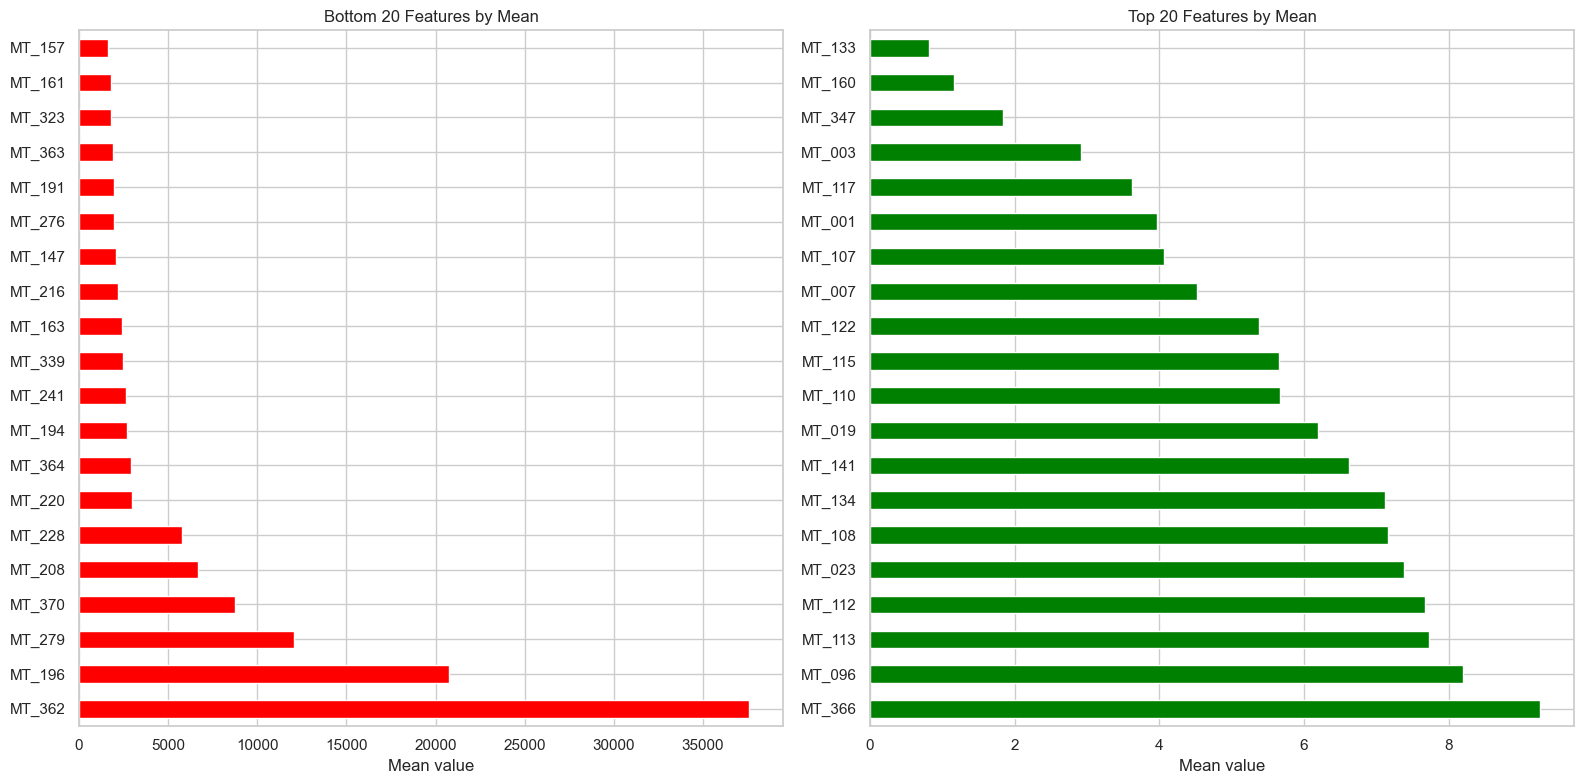

In [178]:
# Select top 20 and bottom 20
top_n = 20
top_features = means_sorted.tail(top_n)   # largest means
bottom_features = means_sorted.head(top_n)  # smallest means

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)

# Top 20
top_features.plot(kind='barh', ax=axes[1], color='green')
axes[1].set_title(f"Top {top_n} Features by Mean")
axes[1].set_xlabel("Mean value")

# Bottom 20
bottom_features.plot(kind='barh', ax=axes[0], color='red')
axes[0].set_title(f"Bottom {top_n} Features by Mean")
axes[0].set_xlabel("Mean value")

plt.tight_layout()
plt.show()

Analysis:

1. **Asymmetry in Means**:

   * The **top 20 features** (green, right panel) have extremely high mean values, with the highest around **35,000–40,000**.
   * The **bottom 20 features** (red, left panel) are much smaller, mostly below **10**.
   * This suggests a **highly skewed distribution**, likely a few customers/meters dominate the overall consum extremes.

3. **Insights**:

   * The top features might represent heavy or high-usage meters, possibly outliers or industrial customers.
   * Bottom features could indicate low usage or less active meters, possibly residential or idu want me to do that?


### Distribution of Electricity Usage

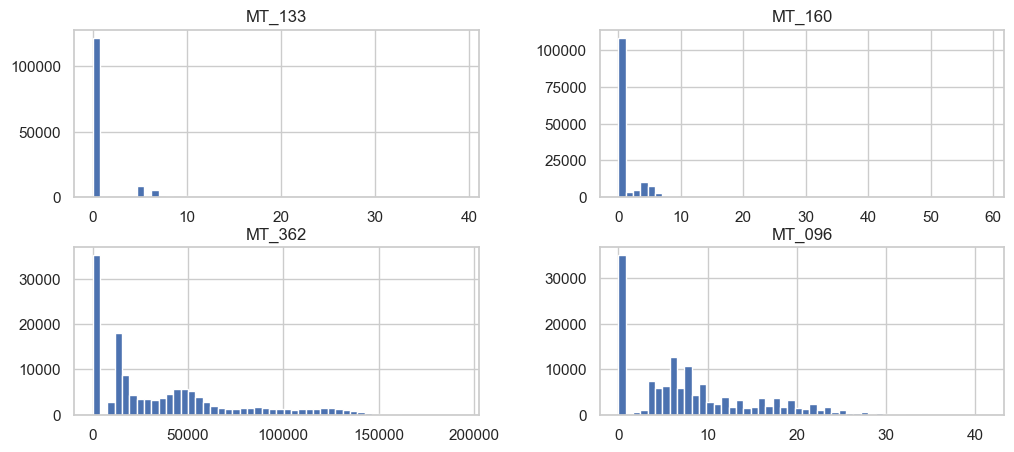

In [181]:
# Distribution of bottom 2 metres with top 2 metres
df[['MT_133','MT_160','MT_362','MT_096']].hist(bins=50);

The distributional analysis reveals two distinct consumption regimes.

MT_133 and MT_160 show highly concentrated low-usage patterns, while MT_362 and MT_096 exhibit heavy-tailed, high-variance behavior.

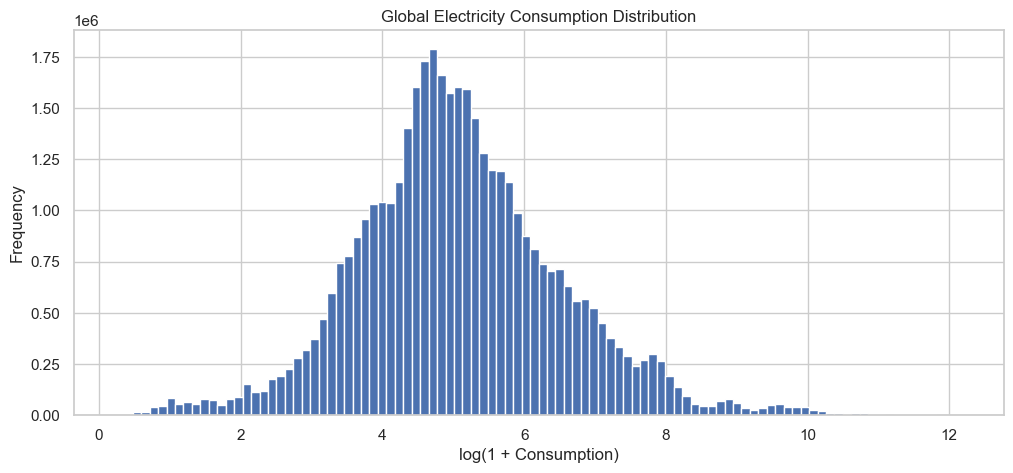

In [183]:
# Checking the distribution of the whole dataset
values = df.values.flatten()
values = values[values > 0]   # remove zeros if needed

plt.hist(np.log1p(values), bins=100)
plt.xlabel("log(1 + Consumption)")
plt.ylabel("Frequency")
plt.title("Global Electricity Consumption Distribution")
plt.show()


**Model Selection Justification**

We are justified in using a single global model because:

- The population does not exhibit clear multimodality after log transformation.
- Differences between low-, medium-, and high-consumption users form a continuous spectrum rather than discrete groups.
- Applying clustering would introduce artificial segmentation not supported by the underlying data distribution.

As shown in the global distribution analysis:

> *Log transformation removes scale-induced multimodality, supporting global modeling while allowing meter-levl effects.*
subgroups.*


### Time Patterns

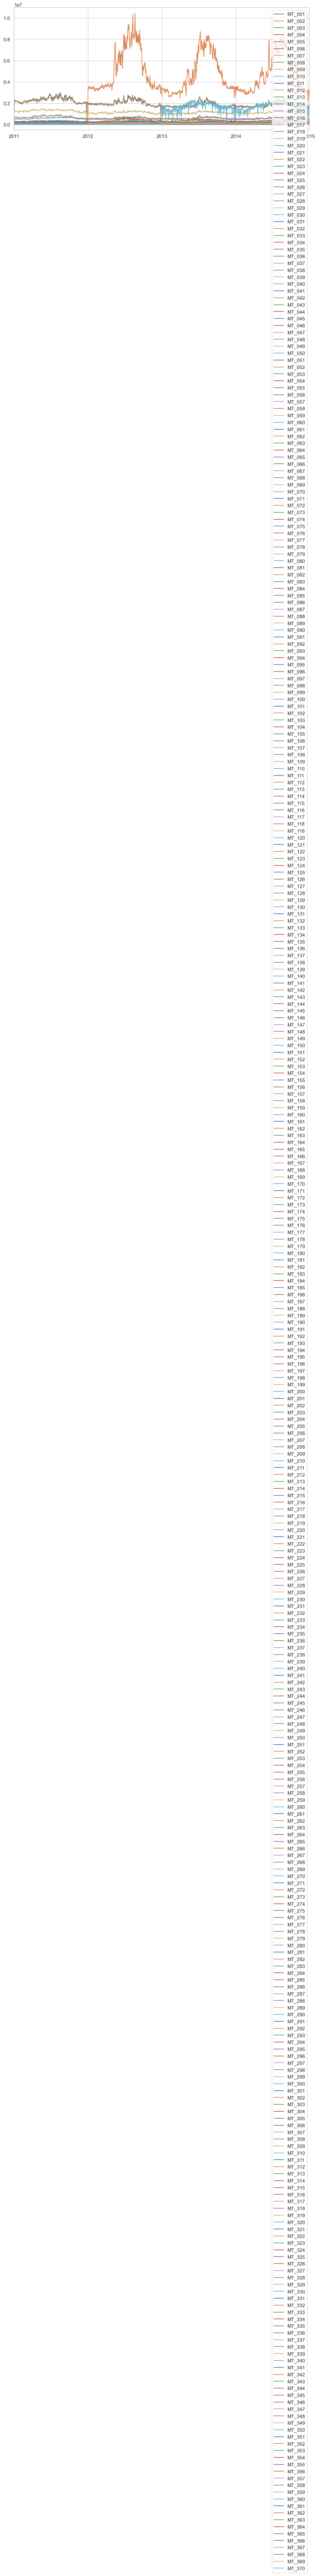

In [186]:
# Total electricity consumption per day across time
df.resample('D').sum().plot();  

**Key Patterns Observed:**

The time-series plot highlights substantial heterogeneity in electricity consumption levels and seasonal amplitude across meters(likely summer/winter). While absolute magnitudes differ, all series exhibit consistent temporal structure characterized by annual seasonality and recurring demand cycles. These differences primarily reflect scale rather than fundamentally distinct consumption regimes.

**Decision implication:**

This motivates normalization or transformation rather than segmentation.

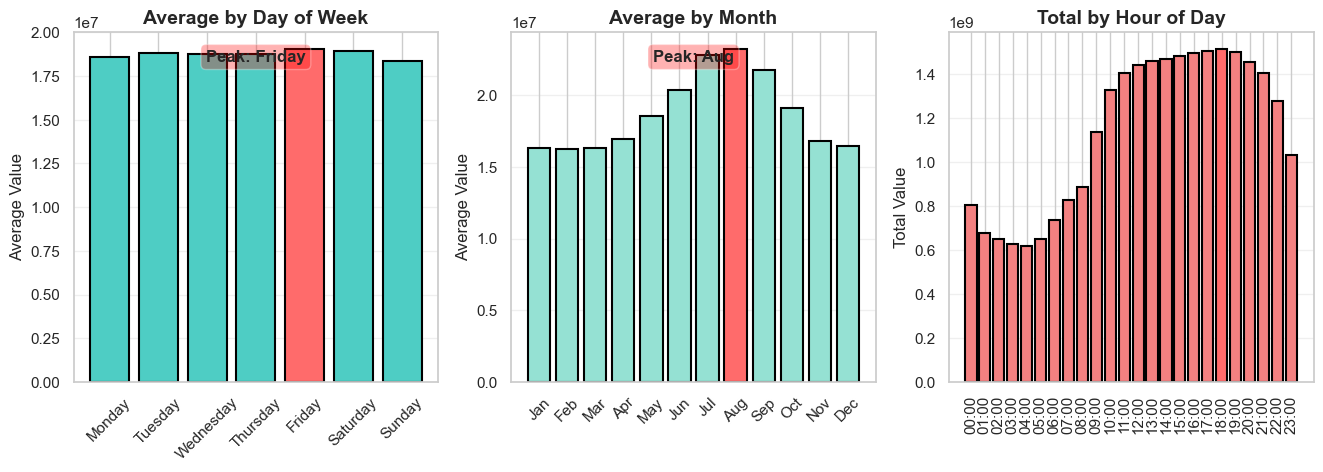

In [188]:
# Prepare the data
daily_data = df.resample('D').sum().sum(axis=1)

# Extract time components
day_of_week = daily_data.groupby(daily_data.index.dayofweek).mean()
month_of_year = daily_data.groupby(daily_data.index.month).mean()
hour_of_day = df.groupby(df.index.hour).sum().sum(axis=1) if hasattr(df.index, 'hour') else None

# Create figure with subplots
fig = plt.figure(figsize=(16, 10))

# 1. Day of Week Pattern
ax1 = plt.subplot(2, 3, 1)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
colors = ['#FF6B6B' if val == day_of_week.max() else '#4ECDC4' for val in day_of_week.values]
bars1 = ax1.bar(days, day_of_week.values, color=colors, edgecolor='black', linewidth=1.5)
ax1.set_title('Average by Day of Week', fontsize=14, fontweight='bold')
ax1.set_ylabel('Average Value')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')
peak_day_name = days[day_of_week.idxmax()]
ax1.text(0.5, 0.95, f'Peak: {peak_day_name}', transform=ax1.transAxes, 
         ha='center', va='top', fontsize=12, fontweight='bold', 
         bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))

# 2. Month of Year Pattern
ax2 = plt.subplot(2, 3, 2)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = ['#FF6B6B' if val == month_of_year.max() else '#95E1D3' for val in month_of_year.values]
bars2 = ax2.bar(months, month_of_year.values, color=colors, edgecolor='black', linewidth=1.5)
ax2.set_title('Average by Month', fontsize=14, fontweight='bold')
ax2.set_ylabel('Average Value')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')
peak_month_name = months[month_of_year.idxmax() - 1]
ax2.text(0.5, 0.95, f'Peak: {peak_month_name}', transform=ax2.transAxes, 
         ha='center', va='top', fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))

# 3. Hour of Day Pattern (if hourly data exists)
ax3 = plt.subplot(2, 3, 3)
if hour_of_day is not None and len(hour_of_day) > 1:
    hours = [f'{h:02d}:00' for h in hour_of_day.index]
    colors = ['#FF6B6B' if val == hour_of_day.max() else '#F38181' for val in hour_of_day.values]
    bars3 = ax3.bar(hours, hour_of_day.values, color=colors, edgecolor='black', linewidth=1.5)
    ax3.set_title('Total by Hour of Day', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Total Value')
    ax3.tick_params(axis='x', rotation=90)
    ax3.grid(True, alpha=0.3, axis='y')
    peak_hour = f'{hour_of_day.idxmax():02d}:00'
    ax3.text

**Deduction on daily pattern**

Average load is fairly flat Monday–Thursday, with a noticeable maximum on Friday, suggesting increased end‑of‑week activity or commercial usage. 

Weekend days show slightly lower averages, consistent with reduced industrial or office dema

**Deduction on monthly pattern**
nDemand gradually rises from winter and spring, reaching a clear maximum in August, then declines toward December. 


This seasonal shape suggests strong summer effects, likely driven by cooling needs or tourism‑related consumption in Portuga

**Deduction on hourly pattern**

Demand is lowest around 02:00–05:00, rises sharply after morning hours, and peaks between roughly 16:00 and 19:00 before slightly declining at night. 

This intraday profile is typical of residential and commercial usage, with higher activity and appliance use in late afternoon and early even.

**Possible outstanding insights**

Combination of Friday, August, and evening‑peak suggests planning for summer Friday evenings as the system’s most stressed periods.

>*

Note that there are structural quirks in the dataset (e.g., daylight‑saving transitions) that may slightly affect hourly aggregates and should be considered in further modeli*ng.ingl.
d.


### Correlation Between Meters

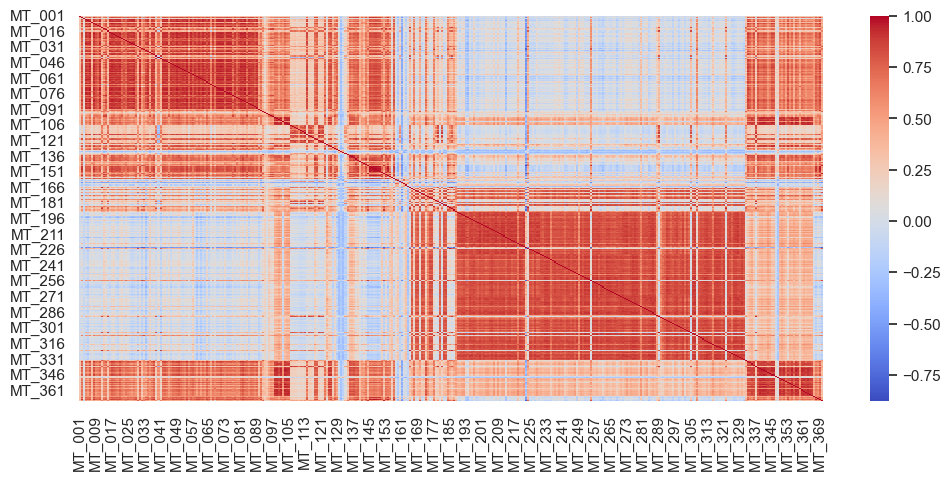

In [192]:
sns.heatmap(df.corr(), cmap="coolwarm");

The heatmap reveals distinct clusters of meters with high internal correlation, indicating groups of meters with similar usage patterns. Some meters show weak or negative correlation with others, suggesting unique or anomalous behavior. These insights can guide feature reduction, clustering, or further investigation of unusual patterns.

Are there distinct groups of meters with similar consumption behavior?

### Clustering / Pattern Discovery

In [199]:
# Ensure no missing values (KMeans cannot handle NaNs)
assert df.isnull().sum().sum() == 0, "Dataset contains missing values"

# Shape check
print("Original shape (time x meters):", df.shape)
print("Transposed shape (meters x time):", df.T.shape)

Original shape (time x meters): (140256, 370)
Transposed shape (meters x time): (370, 140256)


In [200]:
# Scaling to check on patterns
scaler = StandardScaler()
X = df.T  

X_scaled = scaler.fit_transform(X)

In [205]:
# Dimensionality reduction (mandatory for stability)
# PCA removes noise and redundancy

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance:", pca.explained_variance_ratio_.sum())

Explained variance: 0.9981490888188528


**Deduction:**
Metres behave very similarly overall

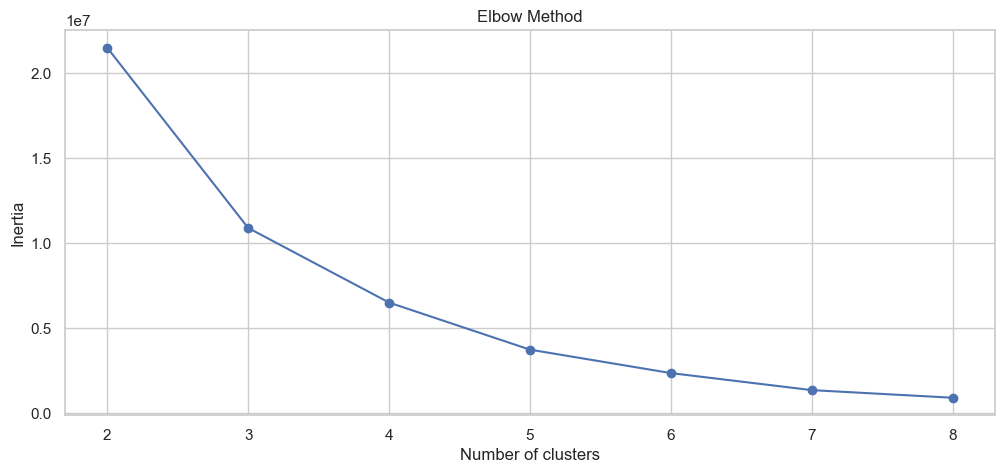

In [224]:
# Find the optimal number of clusters (Elbow Method)
inertia = []
K = range(2, 9)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_pca)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [226]:
# Fitting KMeans model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

pd.Series(labels).value_counts()

0    367
2      2
1      1
Name: count, dtype: int64

In [228]:
# Create a clustering table for all of the rows statistics
# cluster_profiles = df.T.groupby(labels).mean()
# cluster_profiles

In [230]:
summary = pd.DataFrame({
    "mean_usage": df.T.groupby(labels).mean().mean(axis=1),
    "std_usage": df.T.groupby(labels).std().mean(axis=1),
    "max_usage": df.T.groupby(labels).max().mean(axis=1)
})

summary

,mean_usage,std_usage,max_usage
0,341.051316,927.055209,12296.179330
1,37607.987537,NaN,37607.987537
2,16391.561053,6174.509108,20757.598314


`Cluster 0` — Normal / Typical Households

Lowest mean usage

Low-to-moderate variability

Contains the vast majority of meters

This cluster represents typical residential electricity consumption with stable usage patterns.

`Cluster 1` 

Extremely high mean and max usage

Only one meter

Variance undefined → singleton cluster

This meter exhibits consumption behavior far outside the norm, potentially indicating industrial use, faulty metering, or data issues.

`Cluster 2` — High-Usage / Volatile Consumers

Mean usage ~50× higher than Cluster 0

Very high variability

Small number of meters

These meters show consistently high and volatile consumption, likely representing heavy users or atypical households.

> Due to the high temporal resolution of the dataset, cluster behavior was analyzed using aggregated statistics. 

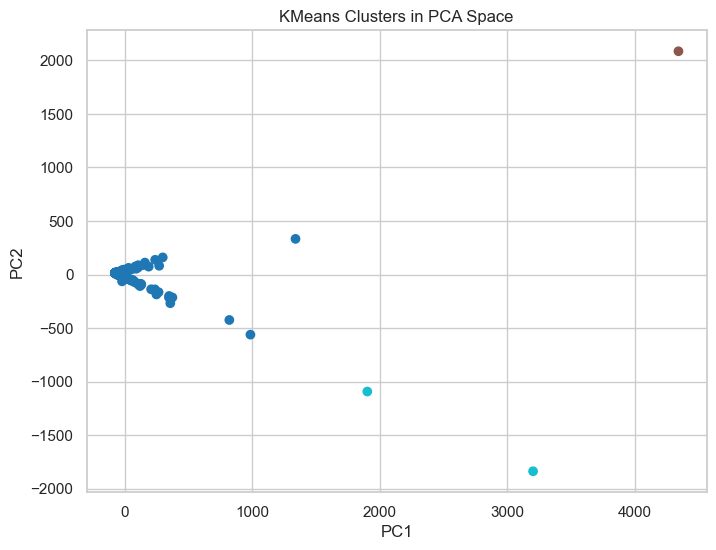

In [233]:
# Visualize clusters in PCA space

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab10')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clusters in PCA Space")
plt.show()

After log transformation and PCA, the electricity consumption profiles form a single dense manifold with no evidence of intrinsic multimodality. Apparent KMeans clusters are driven by a small number of extreme outliers rather than distinct customer segments, indicating that clustering would be artificial rather than data-driven.

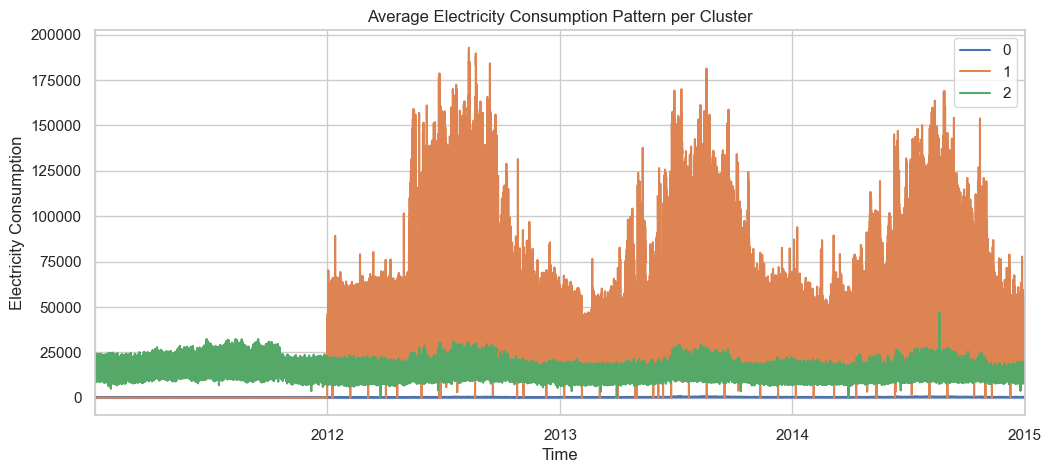

In [236]:
# Average load profile per cluster

cluster_profiles = df.T.groupby(cluster_labels).mean()

# Visualize cluster behavior
cluster_profiles.T.plot(
    title="Average Electricity Consumption Pattern per Cluster",
    figsize=(12, 5)
)

plt.xlabel("Time")
plt.ylabel("Electricity Consumption")
plt.show()

Most households behave very similarly in shape of consumption over time.

Only 3 meters behave very differently enough to be separated.

This is actually common in electricity datasets.

PCA showed that nearly all variance in electricity consumption is shared across meters, indicating highly homogeneous usage patterns. Clustering therefore revealed a dominant normal behavior and a small set of anomalous meters, which we reframe as an anomaly detection problem rather than forced segmentation.

There are no meaningful behavioral segments, only normal users + anomalies.

## DATA PREPARATION

### Data Cleaning and Transformation

#### Creating timestamp column

Since the dataset consists of fixed-interval measurements without an explicit timestamp column, timestamps are reconstructed using the known sampling frequency to enable proper time-series analysis.

In [243]:
# Rename the index
df.index.name = 'timestamp'

# Quick Check
print(df.shape)
print(df.head())

(140256, 370)
                     MT_001  MT_002  MT_003  MT_004  MT_005  MT_006  MT_007  \
timestamp                                                                     
2011-01-01 00:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 00:30:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 00:45:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 01:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 01:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

                     MT_008  MT_009  MT_010  MT_011  MT_012  MT_013  MT_014  \
timestamp                                                                     
2011-01-01 00:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 00:30:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 00:45:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 01:00:00     0.0     0.0  

In [244]:
df = df.reset_index()  # timestamp becomes a regular column
df.head()

,timestamp,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020,MT_021,MT_022,MT_023,MT_024,MT_025,MT_026,MT_027,MT_028,MT_029,MT_030,MT_031,MT_032,MT_033,MT_034,MT_035,MT_036,MT_037,MT_038,MT_039,MT_040,MT_041,MT_042,MT_043,MT_044,MT_045,MT_046,MT_047,MT_048,MT_049,MT_050,MT_051,MT_052,MT_053,MT_054,MT_055,MT_056,MT_057,MT_058,MT_059,MT_060,MT_061,MT_062,MT_063,MT_064,MT_065,MT_066,MT_067,MT_068,MT_069,MT_070,MT_071,MT_072,MT_073,MT_074,MT_075,MT_076,MT_077,MT_078,MT_079,MT_080,MT_081,MT_082,MT_083,MT_084,MT_085,MT_086,MT_087,MT_088,MT_089,MT_090,MT_091,MT_092,MT_093,MT_094,MT_095,MT_096,MT_097,MT_098,MT_099,MT_100,MT_101,MT_102,MT_103,MT_104,MT_105,MT_106,MT_107,MT_108,MT_109,MT_110,MT_111,MT_112,MT_113,MT_114,MT_115,MT_116,MT_117,MT_118,MT_119,MT_120,MT_121,MT_122,MT_123,MT_124,MT_125,MT_126,MT_127,MT_128,MT_129,MT_130,MT_131,MT_132,MT_133,MT_134,MT_135,MT_136,MT_137,MT_138,MT_139,MT_140,MT_141,MT_142,MT_143,MT_144,MT_145,MT_146,MT_147,MT_148,MT_149,MT_150,MT_151,MT_152,MT_153,MT_154,MT_155,MT_156,MT_157,MT_158,MT_159,MT_160,MT_161,MT_162,MT_163,MT_164,MT_165,MT_166,MT_167,MT_168,MT_169,MT_170,MT_171,MT_172,MT_173,MT_174,MT_175,MT_176,MT_177,MT_178,MT_179,MT_180,MT_181,MT_182,MT_183,MT_184,MT_185,MT_186,MT_187,MT_188,MT_189,MT_190,MT_191,MT_192,MT_193,MT_194,MT_195,MT_196,MT_197,MT_198,MT_199,MT_200,MT_201,MT_202,MT_203,MT_204,MT_205,MT_206,MT_207,MT_208,MT_209,MT_210,MT_211,MT_212,MT_213,MT_214,MT_215,MT_216,MT_217,MT_218,MT_219,MT_220,MT_221,MT_222,MT_223,MT_224,MT_225,MT_226,MT_227,MT_228,MT_229,MT_230,MT_231,MT_232,MT_233,MT_234,MT_235,MT_236,MT_237,MT_238,MT_239,MT_240,MT_241,MT_242,MT_243,MT_244,MT_245,MT_246,MT_247,MT_248,MT_249,MT_250,MT_251,MT_252,MT_253,MT_254,MT_255,MT_256,MT_257,MT_258,MT_259,MT_260,MT_261,MT_262,MT_263,MT_264,MT_265,MT_266,MT_267,MT_268,MT_269,MT_270,MT_271,MT_272,MT_273,MT_274,MT_275,MT_276,MT_277,MT_278,MT_279,MT_280,MT_281,MT_282,MT_283,MT_284,MT_285,MT_286,MT_287,MT_288,MT_289,MT_290,MT_291,MT_292,MT_293,MT_294,MT_295,MT_296,MT_297,MT_298,MT_299,MT_300,MT_301,MT_302,MT_303,MT_304,MT_305,MT_306,MT_307,MT_308,MT_309,MT_310,MT_311,MT_312,MT_313,MT_314,MT_315,MT_316,MT_317,MT_318,MT_319,MT_320,MT_321,MT_322,MT_323,MT_324,MT_325,MT_326,MT_327,MT_328,MT_329,MT_330,MT_331,MT_332,MT_333,MT_334,MT_335,MT_336,MT_337,MT_338,MT_339,MT_340,MT_341,MT_342,MT_343,MT_344,MT_345,MT_346,MT_347,MT_348,MT_349,MT_350,MT_351,MT_352,MT_353,MT_354,MT_355,MT_356,MT_357,MT_358,MT_359,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.770335,0.0,0.0,0.0,0.0,0.0,0.0,260.416667,45.721750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.203369,0.0,38.342246,20.363985,0.0,1935.185185,158.006363,1965.437788,0.0,0.0,838.461538,0.0,50.756208,24.570605,0.0,137.885196,80.797011,0.0,74.562212,76.792763,41.482587,0.0,0.0,0.0,93.291732,0.0,39.588859,45.717456,0.0,0.0,0.0,13.422819,22.123746,205.835962,327.859238,920.863309,285.607755,266.521027,1826.271186,218.274112,12166.666667,76.612903,148.867314,272.935780,428.414097,173.089071,235.492958,319.354839,447.761194,288.135593,110.538373,345.578231,4235.294118,260.93750,472.868217,84.0,232.558140,603.036876,199.592668,207.532051,1328.903654,113.074205,680.529301,204.301075,1278.481013,81.728267,444.000000,517.333333,0.0,189.121951,325.833980,228.249744,3263.157895,582.689335,62.219731,380.410959,58.148148,84.924782,38

#### Conversion from Wide to Long format (Melting)

In [246]:
meter_columns = [c for c in df.columns if c != "timestamp"]

df_long = df.melt(
    id_vars="timestamp",
    value_vars=meter_columns,
    var_name="meter_id",
    value_name="consumption_kwh"
)

print(df_long.shape)
df_long.head()

(51894720, 3)


,timestamp,meter_id,consumption_kwh
0,2011-01-01 00:15:00,MT_001,0.0
1,2011-01-01 00:30:00,MT_001,0.0
2,2011-01-01 00:45:00,MT_001,0.0
3,2011-01-01 01:00:00,MT_001,0.0
4,2011-01-01 01:15:00,MT_001,0.0


#### Remove dead meters (all-zero meters)

In [254]:
meter_totals = df_long.groupby("meter_id")["consumption_kwh"].sum()
active_meters = meter_totals[meter_totals > 0].index

df_long = df_long[df_long["meter_id"].isin(active_meters)]

print(f"Active meters: {df_long['meter_id'].nunique()}")

Active meters: 370


#### Sanity Check

In [260]:
print(df_long["timestamp"].min(), df_long["timestamp"].max())
print(df_long.groupby("meter_id").size().describe())

2011-01-01 00:15:00 2015-01-01 00:00:00
count       370.0
mean     140256.0
std           0.0
min      140256.0
25%      140256.0
50%      140256.0
75%      140256.0
max      140256.0
dtype: float64


`Interpretation`

Data spans exactly 4 years, starting at 2011-01-01 00:15:00 and ending at 2015-01-01 00:00:00.
Every meter has exactly 140,256 rows.

std = 0 confirms there is no variation, i.e., all meters have complete data.

We don’t have missing timestamps for any meter.

We also don’t have “dead” meters—each meter recorded data for the entire period.

This is why our earlier check returned 370 active meters; all are active.

#### Create daily aggregates

In [266]:
df_long["date"] = df_long["timestamp"].dt.date
df_long["day_of_week"] = df_long["timestamp"].dt.dayofweek
df_long["is_weekend"] = df_long["day_of_week"].isin([5, 6]).astype(int)

daily_df = (
    df_long
    .groupby(["meter_id", "date"])
    .agg(
        daily_total=("consumption_kwh", "sum"),
        daily_mean=("consumption_kwh", "mean"),
        daily_std=("consumption_kwh", "std"),
        daily_min=("consumption_kwh", "min"),
        daily_max=("consumption_kwh", "max"),
        is_weekend=("is_weekend", "first"),
        day_of_week=("day_of_week", "first")
    )
    .reset_index()
)

daily_df["daily_std"] = daily_df["daily_std"].fillna(0)

print(daily_df.shape)
daily_df.head()

(540940, 9)


,meter_id,date,daily_total,daily_mean,daily_std,daily_min,daily_max,is_weekend,day_of_week
0,MT_001,2011-01-01,0.0,0.0,0.0,0.0,0.0,1,5
1,MT_001,2011-01-02,0.0,0.0,0.0,0.0,0.0,1,6
2,MT_001,2011-01-03,0.0,0.0,0.0,0.0,0.0,0,0
3,MT_001,2011-01-04,0.0,0.0,0.0,0.0,0.0,0,1
4,MT_001,2011-01-05,0.0,0.0,0.0,0.0,0.0,0,2


We have 540,940 rows and 9 columns.

Since we have 370 meters, this means on average:

540
,
940
/
370
≈
1
,
462
 days per meter

That makes sense because your data spans 4 years (~1,461 days including leap year adjustments).

In [276]:
# Testing the above conclusion
mt001 = daily_df[daily_df["meter_id"] == "MT_001"]
print(f"Rows for MT_001: {len(mt001)}")

Rows for MT_001: 1462


#### Save Processed Data

In [278]:
os.makedirs("data/processed", exist_ok=True)

daily_df.to_csv("data/processed/daily_consumption.csv", index=False)
print("Saved daily_consumption.csv")

Saved daily_consumption.csv


### Synthetic Theft Injection

In [303]:
# Select random customers for theft based on IEEE-defined patterns
theft_percentage = 0.05  # 5% of all customers
customers = daily_df['meter_id'].unique()
n_theft_customers = int(len(customers) * theft_percentage)

# Randomly pick customers
theft_customers = np.random.choice(customers, size=n_theft_customers, replace=False)
print(f"Selected {len(theft_customers)} customers for theft injection")

Selected 18 customers for theft injection


In [338]:
# Print the list of selected customers
print("Selected customers for theft injection:")
print(theft_customers)

Selected customers for theft injection:
['MT_249' 'MT_134' 'MT_063' 'MT_352' 'MT_218' 'MT_108' 'MT_008' 'MT_172'
 'MT_336' 'MT_370' 'MT_084' 'MT_316' 'MT_001' 'MT_365' 'MT_268' 'MT_021'
 'MT_257' 'MT_302']


The cell below injects realistic customer-level electricity theft by modifying historical consumption according to distinct real-world fraud behaviors, thereby enabling supervised learning under controlled and interpretable conditions.

In [334]:
# Initialize theft column
daily_df['is_theft'] = 0

# To keep track of what pattern we applied to each customer
theft_patterns = {}

# Loop through customers and inject theft
for customer in theft_customers:
    
    # Randomly pick a theft pattern based on IEEE research probabilities
    pattern_type = np.random.choice(
        ['meter_tampering', 'cable_bypass', 'partial_bypass', 'time_based', 'gradual'],
        p=[0.35, 0.25, 0.20, 0.15, 0.05]
    )
        # So for each customer:
            # There is a 35% chance they get meter tampering
            # A 25% chance of cable bypass
            # A 20% chance of partial bypass
            # A 15% chance of time-based theft
            # A 5% chance of gradual theft
    
    # Get customer's data
    mask = daily_df['meter_id'] == customer
    customer_data = daily_df[mask].copy()

    # Applying the chosen theft patterns
    # Pattern 1: Meter Tampering - Manipulates electricity meter so that it records only a fraction of the actual consumption.
    if pattern_type == 'meter_tampering':
        reduction_factor = np.random.uniform(0.4, 0.8)  # reduce 40-80%
        theft_days = np.random.random(len(customer_data)) < 0.7  # affect about 70% of days
        noise = np.random.normal(0, 0.05, sum(theft_days))  # small random noise
        customer_data.loc[theft_days, 'daily_total'] *= (1 - reduction_factor) # Update daily total
        customer_data.loc[theft_days, 'daily_total'] *= (1 + noise) # Add some noise
    
    # Pattern 2: Cable Bypass - Connects appliances directly to the power line, completely bypassing the meter.
    elif pattern_type == 'cable_bypass':
        n_periods = np.random.randint(2, 5)
        period_lengths = np.random.randint(5, 15, n_periods) 
        start_idx = 0
        for period_len in period_lengths:
            if start_idx + period_len < len(customer_data):
                customer_data.iloc[start_idx:start_idx+period_len, 
                                   customer_data.columns.get_loc('daily_total')] = 0
                start_idx += period_len + np.random.randint(10, 30)
    
    # Pattern 3: Partial Bypass - Only part of the household load bypasses the meter
    elif pattern_type == 'partial_bypass':
        threshold = np.percentile(customer_data['daily_total'], 30)
        high_days = customer_data['daily_total'] > threshold
        variation = np.random.uniform(-0.1, 0.1, sum(high_days))
        customer_data.loc[high_days, 'daily_total'] = threshold * (1 + variation)
    
    # Pattern 4: Time-Based Theft - Theft occurs only during specific time periods when inspection is unlikely e.g holidays
    elif pattern_type == 'time_based':
        if np.random.random() < 0.5:
            theft_days = customer_data['day_of_week'].isin([5, 6])  # weekends
        else:
            theft_days = customer_data['day_of_week'].isin([0, 1, 2, 3, 4])  # weekdays
        customer_data.loc[theft_days, 'daily_total'] *= 0.4  # 60% reduction
    
    # Pattern 5: Gradual Theft - Slowl increases of theft over time to test detection thresholds, avoid sudden anomalies
    elif pattern_type == 'gradual':
        n_days = len(customer_data)
        reduction_factors = np.linspace(0, 0.7, n_days)
        customer_data['daily_total'] *= (1 - reduction_factors)

    # Recompute derived daily statistics for consistency over a rolling window (e.g., last 7 or 30 days)
    customer_data['daily_mean'] = customer_data['daily_total'].rolling(1462, min_periods=1).mean()
    customer_data['daily_std']  = customer_data['daily_total'].rolling(1462, min_periods=1).std().fillna(0)
    customer_data['daily_min']  = customer_data['daily_total'].rolling(1462, min_periods=1).min()
    customer_data['daily_max']  = customer_data['daily_total'].rolling(1462, min_periods=1).max()
    
    # Write back modified data
    daily_df.loc[mask, 'daily_total'] = customer_data['daily_total']
    daily_df.loc[mask, 'daily_mean']  = customer_data['daily_mean']
    daily_df.loc[mask, 'daily_std']   = customer_data['daily_std']
    daily_df.loc[mask, 'daily_min']   = customer_data['daily_min']
    daily_df.loc[mask, 'daily_max']   = customer_data['daily_max']
    daily_df.loc[mask, 'is_theft']    = 1
    
    # Record pattern info
    theft_patterns[customer] = {
        'pattern': pattern_type,
        'start_date': customer_data['date'].min(),
        'end_date': customer_data['date'].max()
    }

# Summary
print(customer_data.head())
print(f"\nTheft injection complete: {daily_df['is_theft'].sum()} theft records")
print(f"\nClass distribution:\n{daily_df['is_theft'].value_counts()}")

       meter_id        date  daily_total  daily_mean  daily_std  daily_min  \
440062   MT_302  2011-01-01          0.0         0.0        0.0        0.0   
440063   MT_302  2011-01-02          0.0         0.0        0.0        0.0   
440064   MT_302  2011-01-03          0.0         0.0        0.0        0.0   
440065   MT_302  2011-01-04          0.0         0.0        0.0        0.0   
440066   MT_302  2011-01-05          0.0         0.0        0.0        0.0   

        daily_max  is_weekend  day_of_week  is_theft  
440062        0.0           1            5         0  
440063        0.0           1            6         0  
440064        0.0           0            0         0  
440065        0.0           0            1         0  
440066        0.0           0            2         0  

Theft injection complete: 26316 theft records

Class distribution:
is_theft
0    514624
1     26316
Name: count, dtype: int64


In [346]:
# Pick one customer from the theft list to test
theft_customer = theft_customers[0]  # first customer in the list

# Filter the main dataframe for that customer
customer_data = daily_df[daily_df['meter_id'] == theft_customer].sort_values('date')

# Inspect the first few rows
print(customer_data.head(20))

       meter_id        date  daily_total  daily_mean   daily_std  daily_min  \
362576   MT_249  2011-01-01     0.000000    0.000000    0.000000        0.0   
362577   MT_249  2011-01-02     0.000000    0.000000    0.000000        0.0   
362578   MT_249  2011-01-03     0.000000    0.000000    0.000000        0.0   
362579   MT_249  2011-01-04     0.000000    0.000000    0.000000        0.0   
362580   MT_249  2011-01-05     0.000000    0.000000    0.000000        0.0   
362581   MT_249  2011-01-06     0.000000    0.000000    0.000000        0.0   
362582   MT_249  2011-01-07     0.000000    0.000000    0.000000        0.0   
362583   MT_249  2011-01-08     0.000000    0.000000    0.000000        0.0   
362584   MT_249  2011-01-09     0.000000    0.000000    0.000000        0.0   
362585   MT_249  2011-01-10   498.819839   49.881984  157.740683        0.0   
362586   MT_249  2011-01-11   512.447332   91.933379  204.561553        0.0   
362587   MT_249  2011-01-12  1376.845803  199.009414

### Feature Engineering

#### Benford's Law

`Benford Law Analysis of Electricity Consumption`

**Objective:**  - Identify meters whose consumption patterns deviate strongly from expected natural distributions, which could indicate anomalies or possible theft.

In [394]:
# Function to calculate Benford Law violation
def benford_violation(series):
    positive_values = series[series > 0]
    if len(positive_values) == 0:
        return 0
    # Get first digits
    first_digits = positive_values.astype(str).str[0].astype(int)
    # Expected Benford distribution
    benford_dist = np.array([np.log10(1 + 1/d) for d in range(1, 10)])
    # Observed digit distribution
    observed_counts = first_digits.value_counts(normalize=True).reindex(range(1, 10), fill_value=0)
    # Chi-square metric
    expected_counts = benford_dist * len(positive_values)
    observed_actual = observed_counts * len(positive_values)
    chi_square = np.sum((observed_actual - expected_counts)**2 / (expected_counts + 1e-10))
    return chi_square

# Apply per meter
benford_scores = daily_df.groupby('meter_id')['daily_total'].apply(benford_violation).reset_index()
benford_scores.rename(columns={'daily_total': 'benford_violation'}, inplace=True)

# Quick check: top 10 meters with highest Benford violation
print("\nTop 10 meters by Benford violation:")
print(benford_scores.sort_values('benford_violation', ascending=False).head(10))


Top 10 meters by Benford violation:
    meter_id  benford_violation
250   MT_251       10393.880157
269   MT_270        9824.260267
236   MT_237        9194.446591
182   MT_183        9020.594330
277   MT_278        8924.227225
249   MT_250        8525.186532
211   MT_212        8047.199285
306   MT_307        8013.689804
144   MT_145        7830.900755
175   MT_176        7772.706142


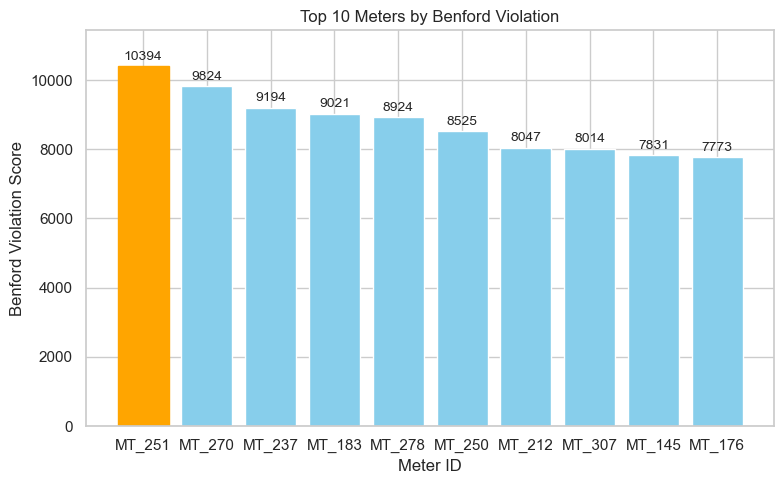

In [402]:
# Plotting
top10_meters = daily_df.groupby('meter_id')['daily_total'] \
    .apply(benford_violation) \
    .reset_index(name='benford_violation') \
    .sort_values('benford_violation', ascending=False) \
    .head(10)

# Plotting
plt.figure(figsize=(8,5))
bars = plt.bar(top10_meters['meter_id'], top10_meters['benford_violation'], color='skyblue')
bars[0].set_color('orange')  # Highlight the top meter

plt.title("Top 10 Meters by Benford Violation")
plt.xlabel("Meter ID")
plt.ylabel("Benford Violation Score")
plt.ylim(0, top10_meters['benford_violation'].max()*1.1)

# Annotate scores on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, f"{yval:.0f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [404]:
def safe_divide(num, denom, eps=1e-5):
    return num / (denom + eps)

# Quick test
print("Safe divide test 10/0 =", safe_divide(10, 0))

Safe divide test 10/0 = 999999.9999999999


In [406]:
feature_list = []
print("Feature list initialized")

Feature list initialized


In [416]:
# Ensure date is datetime
if not np.issubdtype(daily_df['date'].dtype, np.datetime64):
    daily_df['date'] = pd.to_datetime(daily_df['date'])

for meter_id, group in daily_df.groupby('meter_id'):
    group = group.sort_values('date').reset_index(drop=True)
    if len(group) < 30:
        continue
    
    features = {'meter_id': meter_id}

    # BASIC STATS
    mean_total = group['daily_total'].mean()
    std_total = group['daily_total'].std()
    features['total_consumption'] = group['daily_total'].sum()
    features['avg_consumption'] = mean_total
    features['std_consumption'] = std_total
    features['cv_consumption'] = safe_divide(std_total, mean_total)
    
    # PEAK RATIOS
    features['peak_to_avg_ratio'] = safe_divide(group['daily_total'].max(), mean_total)
    features['trough_to_avg_ratio'] = safe_divide(group['daily_total'].min(), mean_total)
    
    # WEEKDAY/WEEKEND
    weekday_avg = group[group['day_of_week'] < 5]['daily_total'].mean()
    weekend_avg = group[group['day_of_week'] >= 5]['daily_total'].mean()
    features['weekend_weekday_ratio'] = safe_divide(weekend_avg, weekday_avg)
    
    # ROLLING STATISTICS
    windows = [7, 30, 90]
    for w in windows:
        if len(group) >= w:
            roll_mean = group['daily_total'].rolling(window=w, min_periods=int(w*0.8)).mean()
            roll_std = group['daily_total'].rolling(window=w, min_periods=int(w*0.8)).std()
            current_val = group['daily_total'].iloc[-1]
            rolling_avg = roll_mean.iloc[-1]
            rolling_sd = roll_std.iloc[-1]
            features[f'z_score_{w}d'] = safe_divide(current_val - rolling_avg, rolling_sd)
            features[f'pct_change_{w}d'] = safe_divide(current_val - rolling_avg, rolling_avg)
            features[f'volatility_{w}d'] = safe_divide(roll_std.mean(), roll_mean.mean())
    
    # OUTLIERS
    q1 = group['daily_total'].quantile(0.25)
    q3 = group['daily_total'].quantile(0.75)
    iqr = q3 - q1
    features['iqr_outlier_count'] = ((group['daily_total'] < (q1 - 1.5*iqr)) | 
                                    (group['daily_total'] > (q3 + 1.5*iqr))).sum()
    
    # SUDDEN DROPS/SPIKES
    daily_changes = group['daily_total'].pct_change()
    features['max_daily_drop'] = daily_changes.min()
    features['max_daily_spike'] = daily_changes.max()
    features['sudden_drop_count'] = (daily_changes < -0.5).sum()
    
    # BENFORD
    features['benford_violation'] = benford_violation(group['daily_total'])
    
    # AUTOCORRELATION
    autocorr_7 = group['daily_total'].autocorr(lag=7)
    autocorr_30 = group['daily_total'].autocorr(lag=30)
    features['autocorr_weekly'] = 0 if pd.isna(autocorr_7) else autocorr_7
    features['autocorr_monthly'] = 0 if pd.isna(autocorr_30) else autocorr_30
    
    # ENTROPY
    hist, _ = np.histogram(group['daily_total'], bins=10)
    hist_probs = hist / hist.sum() if hist.sum() > 0 else np.zeros_like(hist)
    features['consumption_entropy'] = entropy(hist_probs)
    
    # SEASONALITY
    if len(group) >= 365:
        monthly_avg = group.groupby(group['date'].dt.month)['daily_total'].mean()
        features['seasonality_strength'] = safe_divide(monthly_avg.std(), group['daily_total'].std())
    else:
        features['seasonality_strength'] = 0
    
    # THEFT FLAG
    if 'is_theft' in group.columns:
        features['is_theft'] = group['is_theft'].max()
    
    feature_list.append(features)

print(f"✅ Features computed for {len(feature_list)} customers")


✅ Features computed for 370 customers


In [ ]:
features_df = pd.DataFrame(feature_list)

numeric_cols = [c for c in features_df.columns 
                if c not in ['meter_id', 'is_theft'] 
                and pd.api.types.is_numeric_dtype(features_df[c])]

# Handle infinities, NaNs, clip extreme values
features_df[numeric_cols] = features_df[numeric_cols].replace([np.inf, -np.inf], np.nan).fillna(0)
features_df[numeric_cols] = features_df[numeric_cols].clip(-1e6, 1e6)

# Scale
features_df[numeric_cols] = scaler.fit_transform(features_df[numeric_cols])

print(f"✅ Feature engineering complete: {features_df.shape[0]} customers, {features_df.shape[1]} features")
print("Sample features:")
print(features_df.head(3))


In [326]:
class FeatureEngineer:
    def __init__(self):
        self.scaler = StandardScaler()
        
    def calculate_benford_law_violation(self, series):
        positive_values = series[series > 0]
        if len(positive_values) == 0:
            return 0
        
        first_digits = positive_values.astype(str).str[0].astype(int)
        benford_dist = np.array([np.log10(1 + 1/d) for d in range(1, 10)])
        observed_counts = first_digits.value_counts(normalize=True).reindex(range(1, 10), fill_value=0)
        expected_counts = benford_dist * len(positive_values)
        observed_actual = observed_counts * len(positive_values)
        chi_square = np.sum((observed_actual - expected_counts)**2 / (expected_counts + 1e-10))
        return chi_square
    
    def safe_divide(self, numerator, denominator, eps=1e-5):
        """Divide safely to avoid zero/inf"""
        return numerator / (denominator + eps)
    
    def create_all_features(self, daily_df, window_sizes=[7, 30, 90]):
        features_list = []
        
        for meter_id, group in daily_df.groupby('meter_id'):
            group = group.sort_values('date').reset_index(drop=True)
            if len(group) < 30:
                continue
            
            features = {'meter_id': meter_id}
            
            # BASIC STATISTICS
            mean_total = group['daily_total'].mean()
            std_total = group['daily_total'].std()
            
            features['total_consumption'] = group['daily_total'].sum()
            features['avg_consumption'] = mean_total
            features['std_consumption'] = std_total
            features['cv_consumption'] = self.safe_divide(std_total, mean_total)
            
            # PEAK RATIOS
            features['peak_to_avg_ratio'] = self.safe_divide(group['daily_total'].max(), mean_total)
            features['trough_to_avg_ratio'] = self.safe_divide(group['daily_total'].min(), mean_total)
            
            # WEEKDAY/WEEKEND
            weekday_avg = group[group['day_of_week'] < 5]['daily_total'].mean()
            weekend_avg = group[group['day_of_week'] >= 5]['daily_total'].mean()
            features['weekend_weekday_ratio'] = self.safe_divide(weekend_avg, weekday_avg)
            
            # ROLLING STATISTICS
            for window in window_sizes:
                if len(group) >= window:
                    rolling_mean = group['daily_total'].rolling(window=window, min_periods=int(window*0.8)).mean()
                    rolling_std = group['daily_total'].rolling(window=window, min_periods=int(window*0.8)).std()
                    
                    current_val = group['daily_total'].iloc[-1]
                    rolling_avg = rolling_mean.iloc[-1]
                    rolling_sd = rolling_std.iloc[-1]
                    
                    features[f'z_score_{window}d'] = self.safe_divide((current_val - rolling_avg), rolling_sd)
                    features[f'pct_change_{window}d'] = self.safe_divide((current_val - rolling_avg), rolling_avg)
                    features[f'volatility_{window}d'] = self.safe_divide(rolling_std.mean(), rolling_mean.mean())
            
            # OUTLIERS
            q1 = group['daily_total'].quantile(0.25)
            q3 = group['daily_total'].quantile(0.75)
            iqr = q3 - q1
            features['iqr_outlier_count'] = ((group['daily_total'] < (q1 - 1.5*iqr)) | 
                                            (group['daily_total'] > (q3 + 1.5*iqr))).sum()
            
            # SUDDEN DROPS/SPIKES
            daily_changes = group['daily_total'].pct_change()
            features['max_daily_drop'] = daily_changes.min()
            features['max_daily_spike'] = daily_changes.max()
            features['sudden_drop_count'] = (daily_changes < -0.5).sum()
            
            # BENFORD
            features['benford_violation'] = self.calculate_benford_law_violation(group['daily_total'])
            
            # AUTOCORRELATION
            autocorr_7 = group['daily_total'].autocorr(lag=7)
            autocorr_30 = group['daily_total'].autocorr(lag=30)
            features['autocorr_weekly'] = 0 if pd.isna(autocorr_7) else autocorr_7
            features['autocorr_monthly'] = 0 if pd.isna(autocorr_30) else autocorr_30
            
            # ENTROPY
            from scipy.stats import entropy
            hist, _ = np.histogram(group['daily_total'], bins=10)
            hist_probs = hist / hist.sum() if hist.sum() > 0 else np.zeros_like(hist)
            features['consumption_entropy'] = entropy(hist_probs)
            
            # SEASONALITY
            if len(group) >= 365:
                monthly_avg = group.groupby('month')['daily_total'].mean()
                features['seasonality_strength'] = self.safe_divide(monthly_avg.std(), group['daily_total'].std())
            else:
                features['seasonality_strength'] = 0
            
            if 'is_theft' in group.columns:
                features['is_theft'] = group['is_theft'].max()
            
            features_list.append(features)
        
        # Build dataframe
        features_df = pd.DataFrame(features_list)
        
        # SAFE SCALING & CLIPPING
        numeric_cols = [c for c in features_df.columns 
                        if c not in ['meter_id', 'is_theft'] 
                        and pd.api.types.is_numeric_dtype(features_df[c])]
        
        # Replace inf with NaN, then fill
        features_df[numeric_cols] = features_df[numeric_cols].replace([np.inf, -np.inf], np.nan)
        features_df[numeric_cols] = features_df[numeric_cols].fillna(0)
        
        # Clip extreme values
        features_df[numeric_cols] = features_df[numeric_cols].clip(-1e6, 1e6)
        
        # Scaling
        features_df[numeric_cols] = self.scaler.fit_transform(features_df[numeric_cols])
        
        print(f"✅ Feature engineering complete: {features_df.shape[0]} customers, {features_df.shape[1]} features")
        return features_df

# Usage
if __name__ == "__main__":
    # Load data with theft
    df_with_theft = pd.read_csv('data/synthetic/consumption_with_theft.csv')
    df_with_theft['date'] = pd.to_datetime(df_with_theft['date'])
    
    # Engineer features
    engineer = FeatureEngineer()
    features_df = engineer.create_all_features(df_with_theft)
    
    # Save features
    features_df.to_csv('data/processed/final_features.csv', index=False)
    
    # Feature statistics
    print("\n📊 Feature Statistics:")
    print(f"Total features: {len(features_df.columns)}")
    print(f"Customers: {len(features_df)}")
    print(f"Theft cases: {features_df['is_theft'].sum() if 'is_theft' in features_df.columns else 'N/A'}")
    
    # Show first few features
    print("\n🔍 Sample features:")
    print(features_df.iloc[:3, :10])


✅ Feature engineering complete: 370 customers, 27 features

📊 Feature Statistics:
Total features: 27
Customers: 370
Theft cases: 18

🔍 Sample features:
  meter_id  total_consumption  avg_consumption  std_consumption  \
0   MT_001          -8.235056        -0.353968        -0.219993   
1   MT_002           0.169091        -0.337299        -0.204821   
2   MT_003          -5.642381        -0.352380        -0.210402   

   cv_consumption  peak_to_avg_ratio  trough_to_avg_ratio  \
0        0.029563          -0.452893            -0.739103   
1        0.057069          -0.279015            -0.739103   
2        4.379356          10.180543            -0.739103   

   weekend_weekday_ratio  z_score_7d  pct_change_7d  
0              -0.022601   -0.871794      -0.219906  
1               0.174044    2.408689       0.093755  
2               0.400856    0.358551       0.938872  


4. MODEL TRAINING